In [1]:
x = [1, 2, 3, 4, 5]
dir(x)

['__add__',
 '__class__',
 '__contains__',
 '__delattr__',
 '__delitem__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__mul__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__reversed__',
 '__rmul__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'append',
 'clear',
 'copy',
 'count',
 'extend',
 'index',
 'insert',
 'pop',
 'remove',
 'reverse',
 'sort']

In [2]:
class Consumer:
    pass


In [3]:
cl = Consumer()

In [4]:
cl.wealth = 10

In [5]:
cl.wealth

10

In [6]:
dir(cl)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'wealth']

In [7]:
cl.__class__

__main__.Consumer

In [8]:
class Consumer:
    
    def __init__(self, w):
        "Initialize consumer with w dollars of wealth"
        self.wealth = w
        
    def earn(self, y):
        "The consumer earns y dollars" 
        self.wealth += y
        
    def spend(self, x):
        "The consumer spends x dollars if feasible"
        new_wealth = self.wealth - x
        if new_wealth < 0:
            print("Insufficent funds")
        else:
            self.wealth = new_wealth

In [9]:
c1 = Consumer(100)
c2 = Consumer(50)

c1.spend(5)
c2.spend(5)

c1.earn(10)
c2.earn(2)

c1.spend(75)
c2.spend(75)

Insufficent funds


In [11]:
c1.__dict__

{'wealth': 30}

In [12]:
c2.__dict__

{'wealth': 47}

# Solow Model

In [15]:
#%%file solow.py
"""
Filename: solow.py
Reference: http://quant-econ.net/py/python_oop.html
"""
#from __future__ import division  # Omit for Python 3.x
import numpy as np

class Solow:
    r"""
    Implements the Solow growth model with update rule

    .. math::
        k_{t+1} = \frac{s z k^{\alpha}_t}{1 + n}  + k_t \frac{1 - d}{1 + n}
    
    """

    def __init__(self, n, s, d, alpha, z, k):
        """ 
        Solow growth model with Cobb Douglas production function.  All
        parameters are scalars.  See http://quant-econ.net/py/python_oop.html
        for interpretation.
        """
        self.n, self.s, self.d, self.alpha, self.z = n, s, d, alpha, z
        self.k = k
        

    def h(self):
        "Evaluate the h function"
        temp = self.s * self.z * self.k**self.alpha + self.k * (1 - self.d)
        return temp / (1 + self.n)

    def update(self):
        "Update the current state (i.e., the capital stock)."
        self.k =  self.h()
        
    def steady_state(self):
         "Compute the steady state value of capital."
         return ((self.s * self.z) / (self.n + self.d))**(1 / (1 - self.alpha))
     
    def generate_sequence(self, t):
        "Generate and return a time series of length t"
        path = []
        for i in range(t):
            path.append(self.k)
            self.update()
        return path

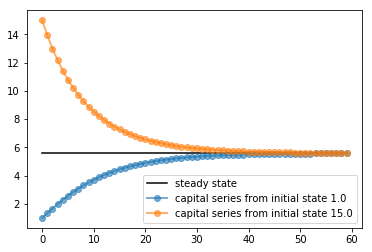

In [17]:
import matplotlib.pyplot as plt
baseline_params = 0.05, 0.25, 0.1, 0.3, 2.0, 1.0
s1 = Solow(*baseline_params)  # The 'splat' operator * breaks up the tuple
s2 = Solow(*baseline_params)
s2.k = 15.0  # Reset s2.k to make high capital economy
T = 60
fig, ax = plt.subplots()
# Plot the common steady state value of capital
ax.plot([s1.steady_state()]*T, 'k-', label='steady state')
# Plot time series for each economy
for s in s1, s2:
    lb = 'capital series from initial state {}'.format(s.k)
    ax.plot(s.generate_sequence(T), 'o-', lw=2, alpha=0.6, label=lb)

ax.legend(loc='lower right')
plt.show()

## Chaos

In [164]:
#%%file chaos_class.py
"""
Filename: chaos_class.py
Reference: http://quant-econ.net/py/python_oop.html
"""
class Chaos:
    """
    Models the dynamical system with :math:`x_{t+1} = r x_t (1 - x_t)`
    """
    def __init__(self, x0, r):
        """
        Initialize with state x0 and parameter r 
        """
        self.x, self.r = x0, r
        
    def update(self):
        "Apply the map to update state."
        self.x =  self.r * self.x *(1 - self.x)
        
    def generate_sequence(self, n):
        "Generate and return a sequence of length n."
        path = []
        for i in range(n):
            path.append(self.x)
            self.update()
        return path

Overwriting chaos_class.py


In [19]:
run chaos_class.py

In [20]:
dir(Chaos)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'generate_sequence',
 'update']

In [21]:
ch = Chaos(0.1, 4.0)
ch.__dict__

{'r': 4.0, 'x': 0.1}

In [22]:
ch.generate_sequence(5)

[0.1, 0.36000000000000004, 0.9216, 0.28901376000000006, 0.8219392261226498]

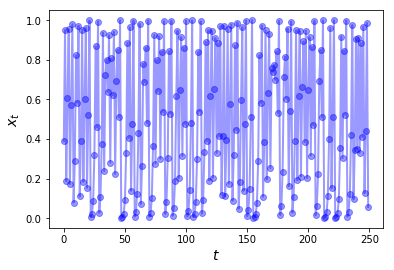

In [33]:
import matplotlib.pyplot as plt
ts_length = 250


fig, ax = plt.subplots()
ax.set_xlabel(r'$t$', fontsize=14)
ax.set_ylabel(r'$x_t$', fontsize=14)
x = ch.generate_sequence(ts_length)
ax.plot(range(ts_length), x, 'bo-', alpha=0.4, lw=2, label=r'$x_t$')
plt.show()

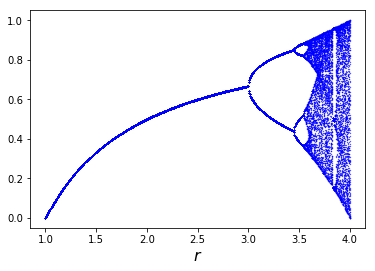

In [169]:
"""
Filename: bifurcation_diagram.py
Reference: http://quant-econ.net/py/python_oop.html
"""
#from chaos_class import Chaos
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ch = Chaos(0.1, 4)
r = 1
while r < 4:
    ch.r = r
    t = ch.generate_sequence(1000)[900:]
    ax.plot([r] * len(t), t, 'b.', ms=0.6)
    r = r + 0.005

ax.set_xlabel(r'$r$', fontsize=16)
plt.show()

In [170]:
Chaos(0.1,1.5).generate_sequence(1000)[975:]

[0.3333333333333333,
 0.33333333333333337,
 0.3333333333333333,
 0.33333333333333337,
 0.3333333333333333,
 0.33333333333333337,
 0.3333333333333333,
 0.33333333333333337,
 0.3333333333333333,
 0.33333333333333337,
 0.3333333333333333,
 0.33333333333333337,
 0.3333333333333333,
 0.33333333333333337,
 0.3333333333333333,
 0.33333333333333337,
 0.3333333333333333,
 0.33333333333333337,
 0.3333333333333333,
 0.33333333333333337,
 0.3333333333333333,
 0.33333333333333337,
 0.3333333333333333,
 0.33333333333333337,
 0.3333333333333333]

## Exercise 2

In [63]:
class Polynomial:
    
    def __init__(self, coeff):
        """
        Initializes polynomial coefficients
        """
        self.coeff = coeff
    
    def evaluate(self, x):
        return sum([c*(x**power) for power, c in enumerate(self.coeff)])
    
    def differentiate(self, x):
        return sum([(c*power)*(x**(power-1)) for power, c in enumerate(self.coeff)])


In [64]:
test = Polynomial([2,4,2])

In [65]:
test.evaluate(2)

18

In [66]:
test.differentiate(2)

12.0

## Exercise 1

[Lecture here](https://lectures.quantecon.org/py/python_oop.html)

In [80]:
class ECDF:
    
    def __init__(self, observations):
        self.observations = observations
        
    def __call__(self, x):
        counts = []
        for item in self.observations:
            counts.append(item<=x)
        return sum(counts)/len(self.observations)


In [89]:
from random import uniform
samples = [uniform(0,1) for i in range(1000)]
F = ECDF(samples)
F(0.5)

0.482

In [129]:
from random import gauss
samples = [gauss(0,1) for i in range(1000)]
F = ECDF(samples)
F(1.96)

0.98